<a href="https://colab.research.google.com/github/arifitriaa/NotesML/blob/main/HW2_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-17 13:01:15--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-17 13:01:15 (20.8 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [39]:
data = pd.read_csv('housing.csv')

In [40]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Question 1

Find a feature with missing values. How many missing values does it have?*italicized text*

In [43]:
data.isna().value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value  ocean_proximity
False      False     False               False        False           False       False       False          False               False              20433
                                                      True            False       False       False          False               False                207
dtype: int64

In [44]:
data.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [45]:
incomplete = data.isna().mean()*100
print(incomplete[incomplete > 0])

total_bedrooms    1.002907
dtype: float64


In [46]:
data.duplicated().value_counts()

False    20640
dtype: int64

Question 2

Median for population


In [47]:
np.median(data['population'])

1166.0

Question 3

Best way to fill NAs


In [48]:
data.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-124.3500,-122.2900,-121.8000,-118.4900,-118.01000,-117.25000,-117.080000,-116.29000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,32.5400,33.6300,33.9300,34.2600,37.71000,38.48000,38.960000,40.62610,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,1.0000,13.0000,18.0000,29.0000,37.00000,46.00000,52.000000,52.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,2.0000,941.0000,1447.7500,2127.0000,3148.00000,4651.50000,6213.200000,11212.11000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,1.0000,198.0000,296.0000,435.0000,647.00000,965.00000,1275.400000,2221.36000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,3.0000,510.0000,787.0000,1166.0000,1725.00000,2566.00000,3288.000000,5805.83000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,1.0000,184.0000,280.0000,409.0000,605.00000,890.00000,1162.000000,1982.66000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,0.4999,1.9038,2.5634,3.5348,4.74325,6.15921,7.300305,10.59654,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,14999.0000,82300.0000,119600.0000,179700.0000,264725.00000,376600.00000,489810.000000,500001.00000,500001.0000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


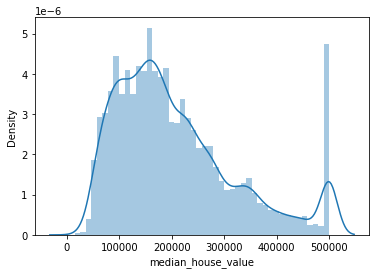

In [49]:
sns.distplot(data.median_house_value)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


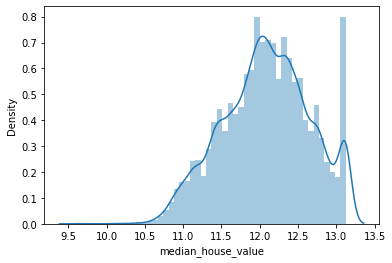

In [50]:
sns.distplot(np.log1p(data.median_house_value))

In [51]:
#data preaparation

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

In [52]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [53]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [54]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [55]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [56]:
check = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']

def prepare_X(df, fillna_value):
    df_num = df[check]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [76]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [77]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [75]:
mean = df_train.total_bedrooms.mean()

X_mean_train = prepare_X(df_train, fillna_value=mean)
w_0_mean, w_mean = train_linear_regression(X_mean_train, y_train)

TypeError: ignored